In [1]:
#After predicting disordered residues with iupred,
#each string of contiguous disordered residues was
#saved an item in a dictionary. Likewise, there is 
#a dictionary for all ordered domains and a
#dictionary that contains the entirety of every
#proteins sequence proteome-wide. These dictionaries
#were then exported as a pickle bundle which this
#bit of code unpacks and converts to a dictinary.

import pickle as pkl

disorderdictionary = open('UP000000803DisorderDict.pkl', 'rb')
ProteomeDisorderDict = pkl.load(disorderdictionary)

orderdictionary = open('UP000000803OrderDict.pkl', 'rb')
ProteomeOrderDict = pkl.load(orderdictionary)

proteomedictionary = open('UP000000803ProteomeDict.pkl', 'rb')
ProteomeDict =  pkl.load(proteomedictionary)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def residue_distance(protein_dictionary, residue_list):
    #finds the average distance between residues specified in the residue_list in amino acids
    average = {}
    for protein in protein_dictionary:
        distance = 0
        sequence = protein_dictionary[protein]
        values = []
        end = False
        if len(sequence) > 100:
            if sequence[-1] in residue_list:
                end = True
            while sequence:
                if sequence[0] in residue_list:
                    values.append(distance)
                    distance = 0
                    sequence = sequence[1:]
                else:
                    distance += 1
                    sequence = sequence[1:]
            if end:
                average[protein] = values[1:]
            elif len(values) <= 2:
                average[protein] = []
            else:
                average[protein] = values[1:len(values)-1]
    return average

def nested_residue_distance(nested_dict, residue_list):
    #takes in a nested dictionary of many sequences and finds the average of each sequence
    nested_average = {}
    for protein in nested_dict:
        subseq_dictionary_average = residue_distance(nested_dict[protein], residue_list)
        nested_average[protein] = subseq_dictionary_average
    return nested_average

def dictionary_organizer(dict, protein_dict):
    #this takes the list of values and organizes them into a new dictionary
    organized_dict = {}
    for key in dict:
        zero_count = 0
        nonzero_count = 0
        total = 0
        values = dict[key]
        while values:
            if values[0] == 0:
                zero_count += 1
                values = values[1:]
            else:
                nonzero_count += 1
                total += values[0]
                values = values[1:]
        if nonzero_count > 0:
            organized_dict[key] = [zero_count / (len(protein_dict[key]) / 100), total / nonzero_count]
        else:
            organized_dict[key] = [zero_count / (len(protein_dict[key]) / 100), total]
    return organized_dict

def nested_dictionary_organizer(nested_dict, nested_protein_dict):
    nested_organized_dict = {}
    for key in nested_dict:
        nested_organized_dict[key] = dictionary_organizer(nested_dict[key], nested_protein_dict[key])
    return nested_organized_dict

def dictionary_to_list(dict):
    zero_points = []
    nonzero_averages = []
    for key in dict:
        zero_points.append(dict[key][0])
        nonzero_averages.append(dict[key][1])
    return zero_points, nonzero_averages

def nested_dictionary_to_list(nested_dict):
    zero_points = []
    nonzero_averages = []
    for key in nested_dict:
        zero_nested_list, nonzero_nested_list = dictionary_to_list(nested_dict[key])
        zero_points.extend(zero_nested_list)
        nonzero_averages.extend(nonzero_nested_list)
    return zero_points, nonzero_averages

In [3]:
idr = {'dmcdt1': 'MAQPSVAAFFTNRKRAALDDAISIKNRRLVEPAETVSPASAPSQLPAGDQDADLDTLKAAATGMRTRSGRTARLIVTAAQESKKKTPAAAKMEPHIKQPKLVQFIKKGTLSPRKQAQSSKLDEEELQQSSAISEHTPKVNFTITSQQNADNVQRGLRTPTKQILKDASPIKADLRRQLTFDEVKTKVSRSAKLQELKAVLALKAALEQKRKEQEERNRKLRDAGPSPSKSKMSVQLKEFDTIELEVLISPLKTFKTPTKIPPPTPDKHELMSPRHTDVSKRLLFSPAKNGSPVKLVE'}

cdt1_positive = residue_distance(idr, ['R', 'K'])
cdt1_hydrophobic = residue_distance(idr, ['L', 'I', 'V', 'F', 'Y', 'W'])
cdt1_proline = residue_distance(idr, ['P'])

organized_cdt1_positive = dictionary_organizer(cdt1_positive, idr)
organized_cdt1_hydrophobic = dictionary_organizer(cdt1_hydrophobic, idr)
organized_cdt1_proline = dictionary_organizer(cdt1_proline, idr)

cdt1_positive_zero, cdt1_positive_nonzero = dictionary_to_list(organized_cdt1_positive)
cdt1_hydrophobic_zero, cdt1_hydrophobic_nonzero = dictionary_to_list(organized_cdt1_hydrophobic)
cdt1_proline_zero, cdt1_proline_nonzero = dictionary_to_list(organized_cdt1_proline)

print(cdt1_positive_zero, cdt1_positive_nonzero)
print(cdt1_hydrophobic_zero, cdt1_hydrophobic_nonzero)
print(cdt1_proline_zero, cdt1_proline_nonzero)

[4.04040404040404] [5.414634146341464]
[4.04040404040404] [4.653061224489796]
[0.6734006734006733] [13.736842105263158]


<ipython-input-4-16730f24f0b0>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])


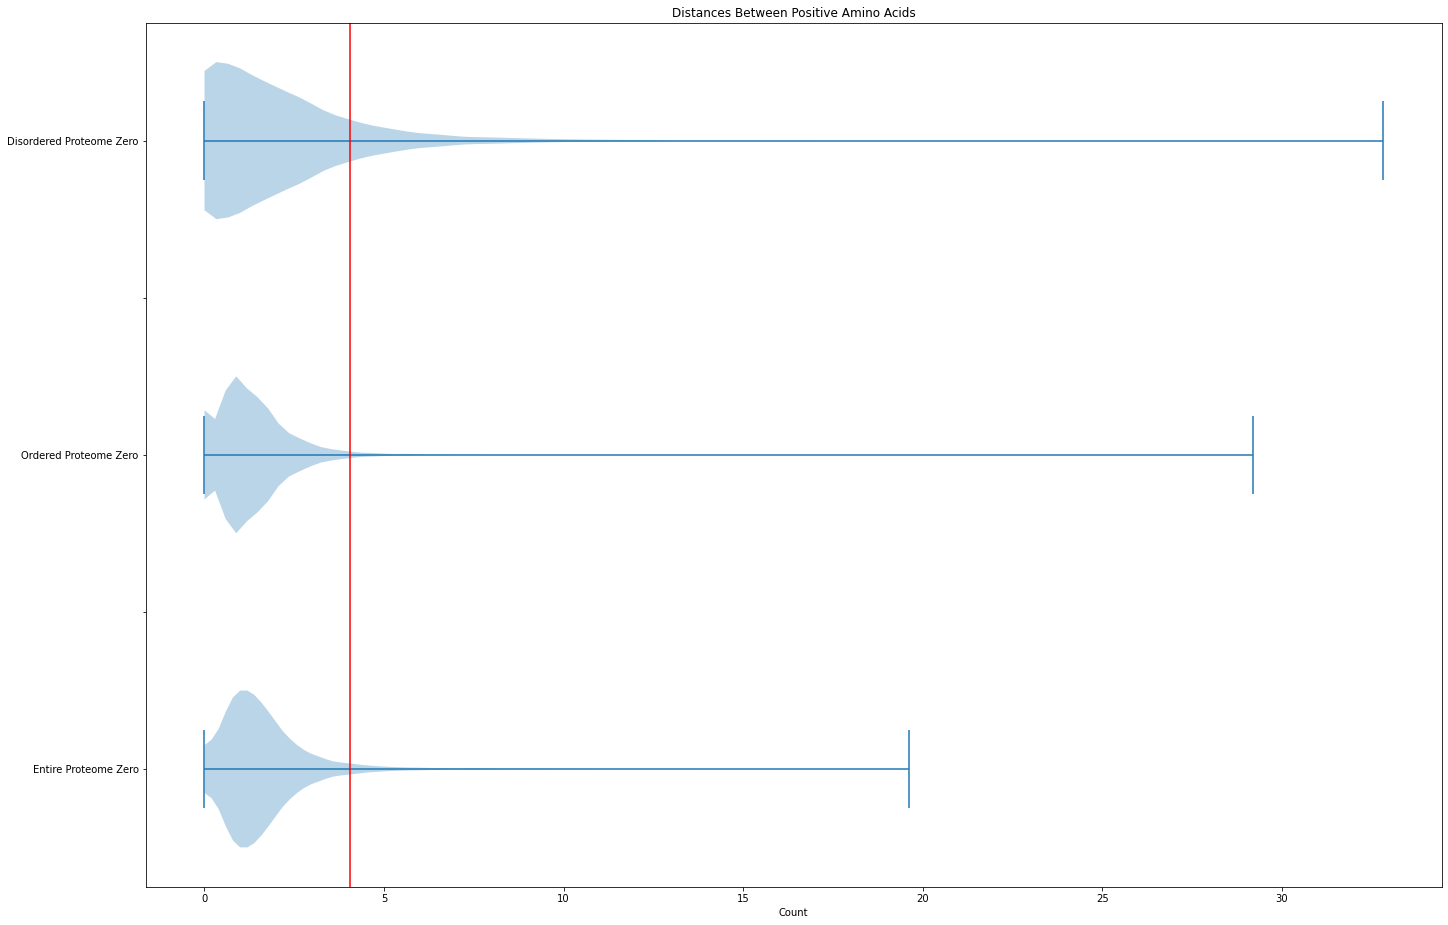

In [4]:
drosophila_proteome_positive_average = residue_distance(ProteomeDict, ['R', 'K'])
drosophila_ordered_proteome_positive_average = nested_residue_distance(ProteomeOrderDict, ['R', 'K'])
drosophila_disordered_proteome_positive_average = nested_residue_distance(ProteomeDisorderDict, ['R', 'K'])

positive = dictionary_organizer(drosophila_proteome_positive_average, ProteomeDict)
ordered_positive = nested_dictionary_organizer(drosophila_ordered_proteome_positive_average, ProteomeOrderDict)
disordered_positive = nested_dictionary_organizer(drosophila_disordered_proteome_positive_average, ProteomeDisorderDict)

positive_zero, positive_nonzero = dictionary_to_list(positive)
ordered_positive_zero, ordered_positive_nonzero = nested_dictionary_to_list(ordered_positive)
disordered_positive_zero, disordered_positive_nonzero = nested_dictionary_to_list(disordered_positive)
    
data_to_plot = [positive_zero, ordered_positive_zero, disordered_positive_zero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])

#DmCdt1 line
plt.axvline(x=4.04040404040404, color='r')
plt.xlabel('Count')
plt.title('Distances Between Positive Amino Acids')

plt.show()

<ipython-input-5-77763a4746a1>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])


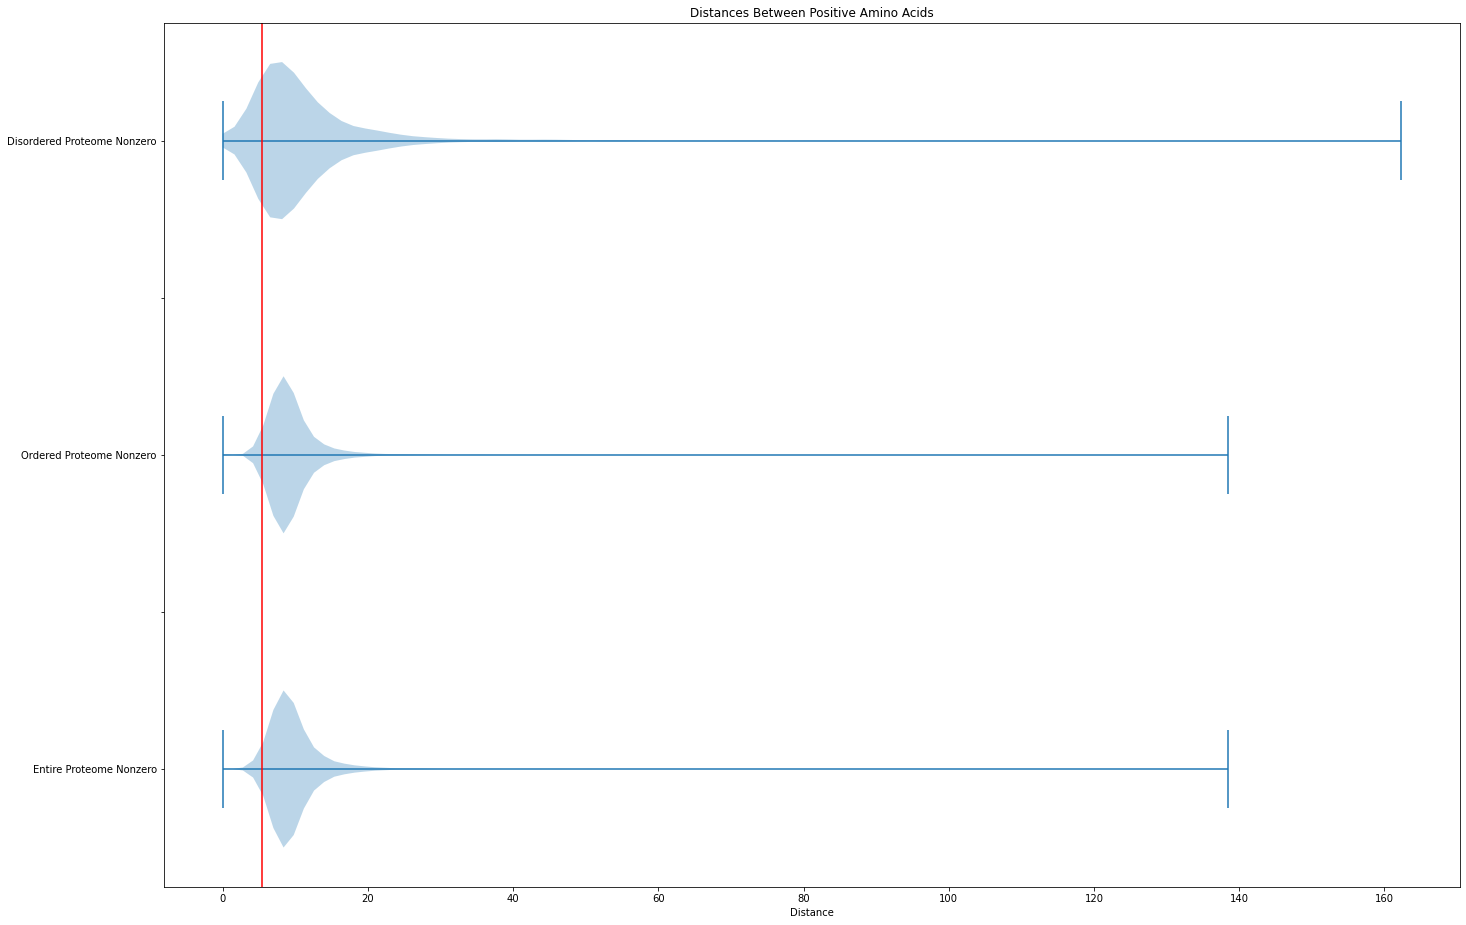

In [5]:
data_to_plot = [positive_nonzero, ordered_positive_nonzero, disordered_positive_nonzero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])

#DmCdt1 line
plt.axvline(x=5.404761904761905, color='r')
plt.xlabel('Distance')
plt.title('Distances Between Positive Amino Acids')

plt.show()

<ipython-input-6-baf32e054cc1>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])


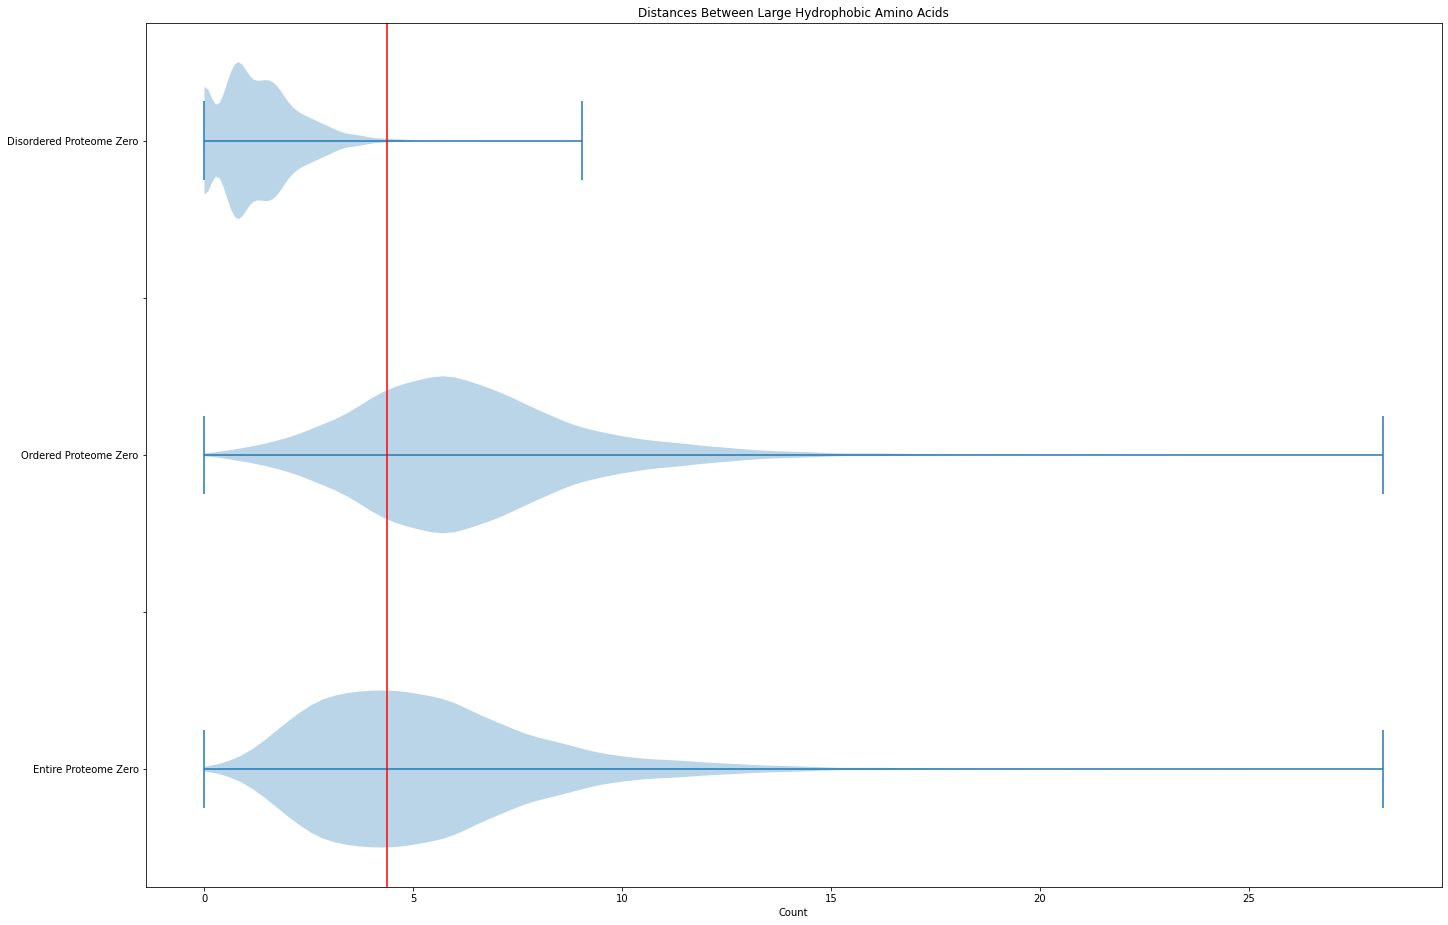

In [6]:
drosophila_proteome_hydrophobic_average = residue_distance(ProteomeDict, ['L', 'I', 'F', 'Y', 'W'])
drosophila_ordered_proteome_hydrophobic_average = nested_residue_distance(ProteomeOrderDict, ['L', 'I', 'F', 'Y', 'W'])
drosophila_disordered_proteome_hydrophobic_average = nested_residue_distance(ProteomeDisorderDict, ['L', 'I', 'F', 'Y', 'W'])

hydrophobic = dictionary_organizer(drosophila_proteome_hydrophobic_average, ProteomeDict)
ordered_hydrophobic = nested_dictionary_organizer(drosophila_ordered_proteome_hydrophobic_average, ProteomeOrderDict)
disordered_hydrophobic = nested_dictionary_organizer(drosophila_disordered_proteome_hydrophobic_average, ProteomeDisorderDict)

hydrophobic_zero, hydrophobic_nonzero = dictionary_to_list(hydrophobic)
ordered_hydrophobic_zero, ordered_hydrophobic_nonzero = nested_dictionary_to_list(ordered_hydrophobic)
disordered_hydrophobic_zero, disordered_hydrophobic_nonzero = nested_dictionary_to_list(disordered_hydrophobic)

data_to_plot = [hydrophobic_zero, ordered_hydrophobic_zero, disordered_hydrophobic_zero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])

#DmCdt1 line
plt.axvline(x=4.377104377104377, color='r')

plt.xlabel('Count')
plt.title('Distances Between Large Hydrophobic Amino Acids')

plt.show()

<ipython-input-7-c2f758e0280f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])


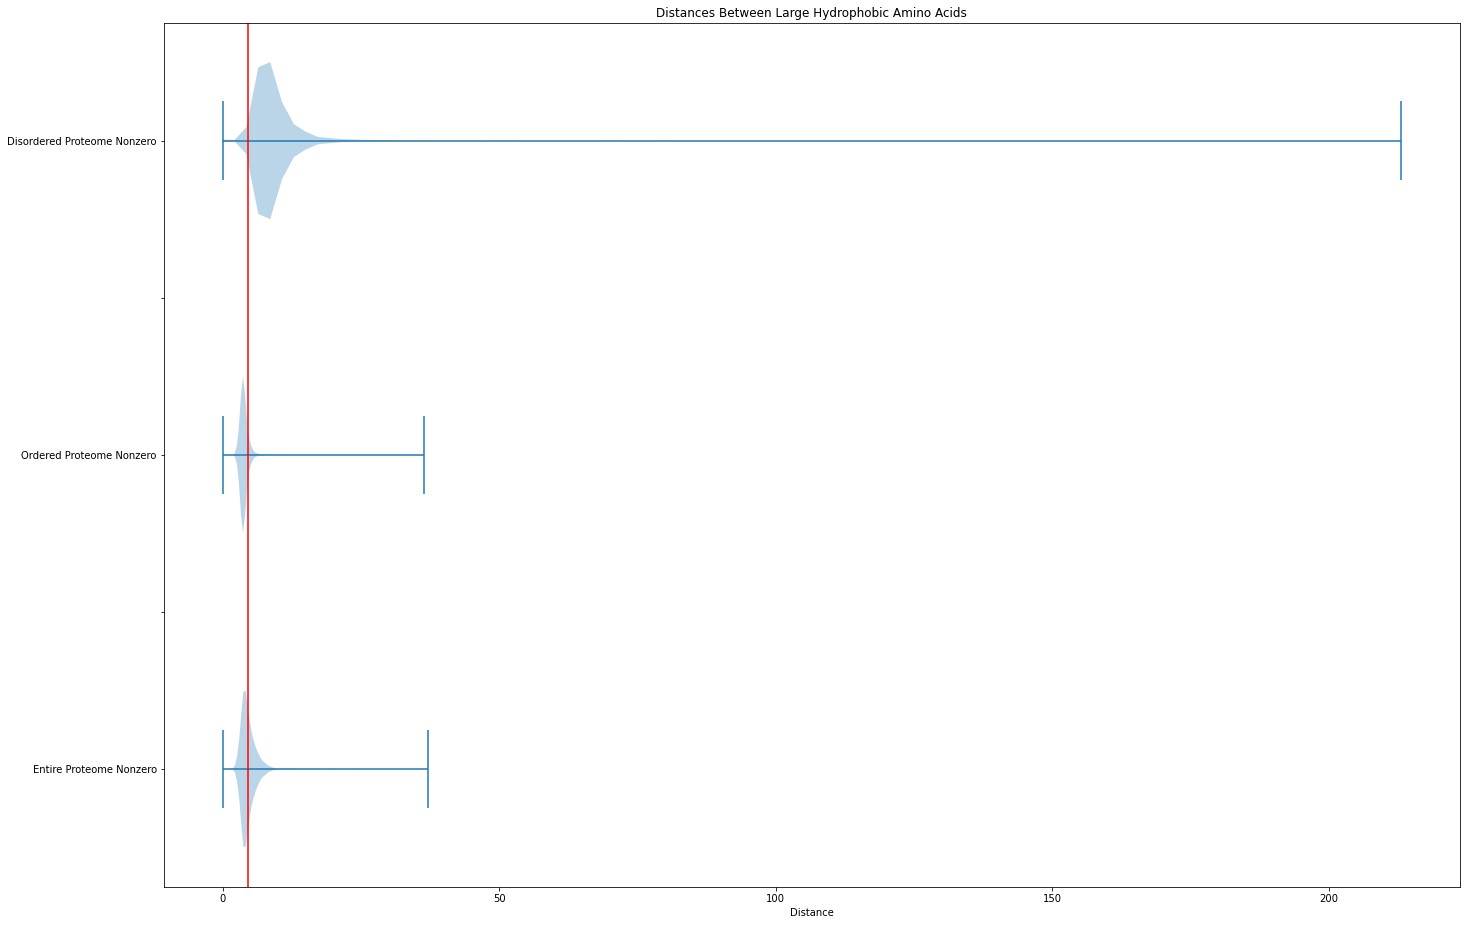

In [7]:
data_to_plot = [hydrophobic_nonzero, ordered_hydrophobic_nonzero, disordered_hydrophobic_nonzero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])

#DmCdt1 line
plt.axvline(x=4.653061224489796, color='r')

plt.xlabel('Distance')
plt.title('Distances Between Large Hydrophobic Amino Acids')

plt.show()

<ipython-input-8-7442c30c3700>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])


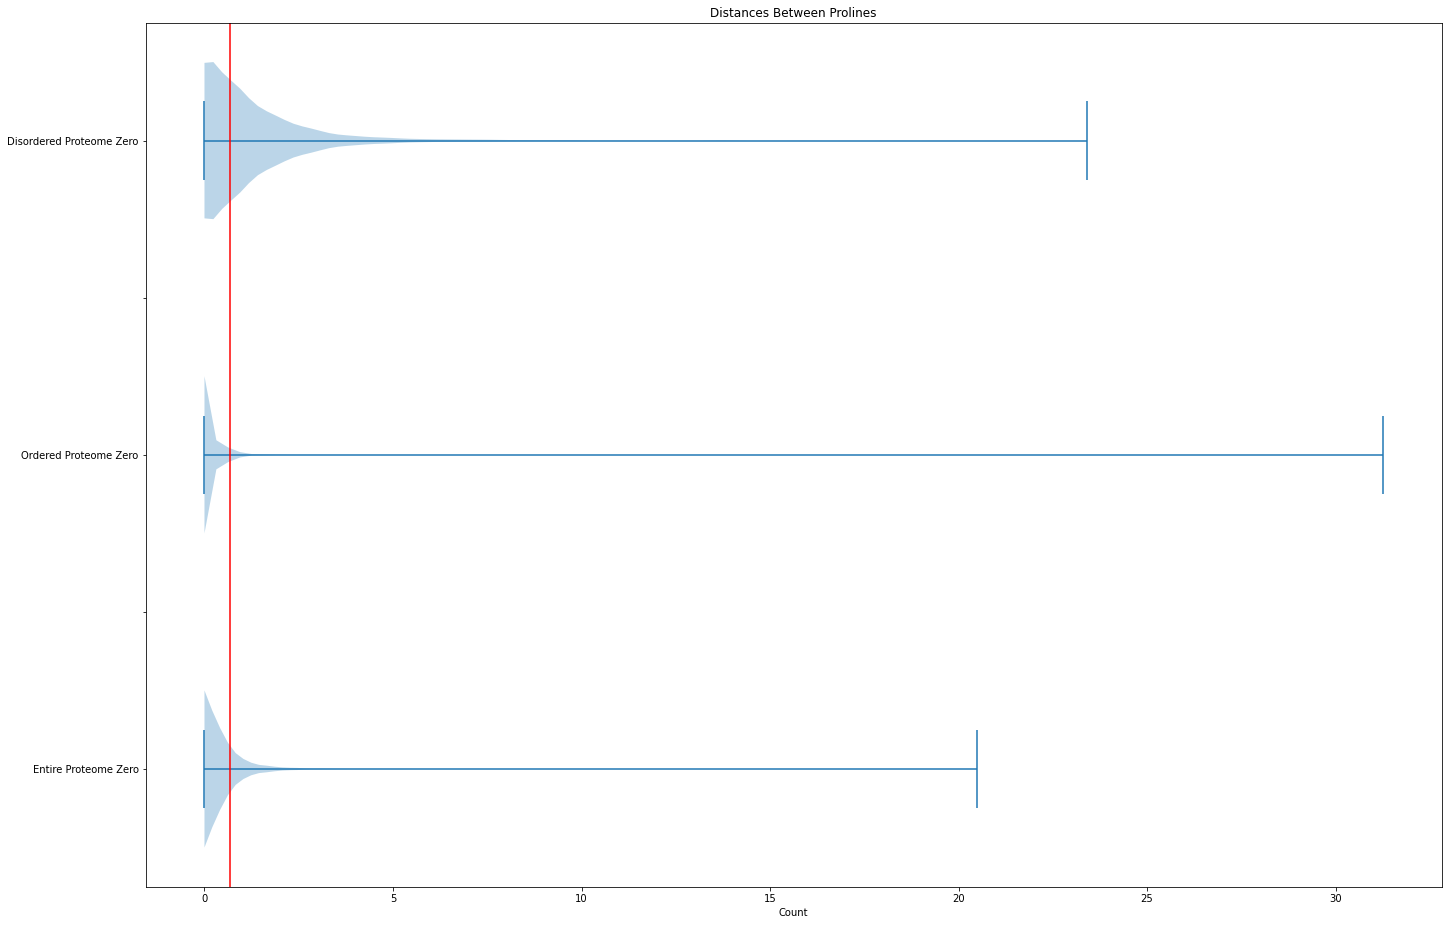

In [8]:
drosophila_proteome_proline_average = residue_distance(ProteomeDict, ['P'])
drosophila_ordered_proteome_proline_average = nested_residue_distance(ProteomeOrderDict, ['P'])
drosophila_disordered_proteome_proline_average = nested_residue_distance(ProteomeDisorderDict, ['P'])

proline = dictionary_organizer(drosophila_proteome_proline_average, ProteomeDict)
ordered_proline = nested_dictionary_organizer(drosophila_ordered_proteome_proline_average, ProteomeOrderDict)
disordered_proline = nested_dictionary_organizer(drosophila_disordered_proteome_proline_average, ProteomeDisorderDict)

proline_zero, proline_nonzero = dictionary_to_list(proline)
ordered_proline_zero, ordered_proline_nonzero = nested_dictionary_to_list(ordered_proline)
disordered_proline_zero, disordered_proline_nonzero = nested_dictionary_to_list(disordered_proline)

data_to_plot = [proline_zero, ordered_proline_zero, disordered_proline_zero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Zero', '', 'Ordered Proteome Zero', '', 'Disordered Proteome Zero'])

#DmCdt1 line
plt.axvline(x=0.6734006734006733, color='r')

plt.xlabel('Count')
plt.title('Distances Between Prolines')

plt.show()

<ipython-input-9-13ab4579cea4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])


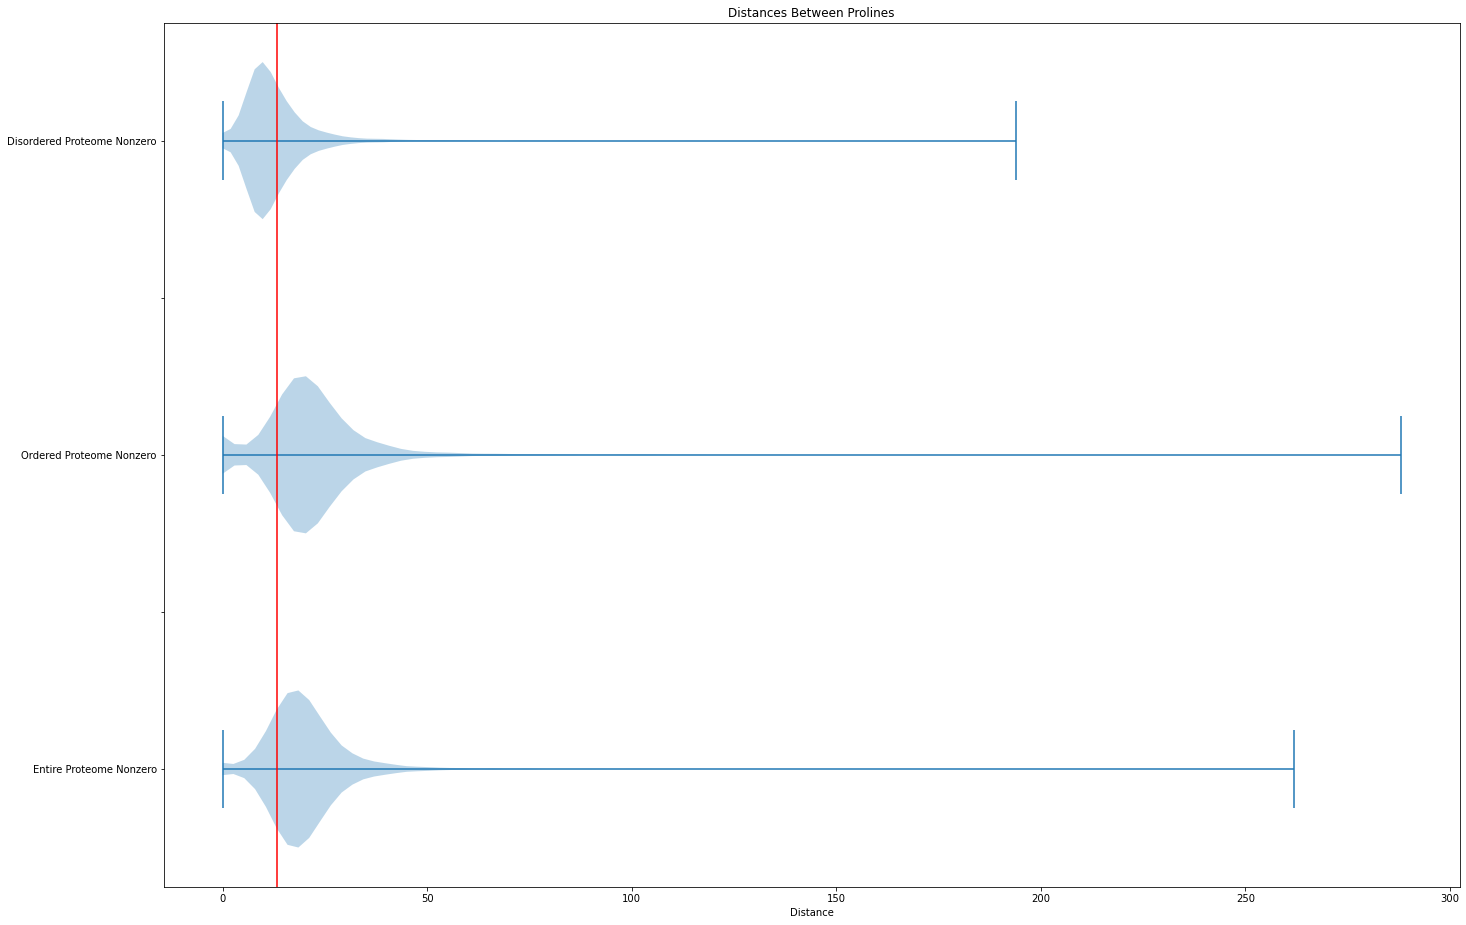

In [9]:
data_to_plot = [proline_nonzero, ordered_proline_nonzero, disordered_proline_nonzero]

fig = plt.figure()

ax = fig.add_axes([0,0,3,3])

bp = ax.violinplot(data_to_plot, vert=False)

ax.set_yticklabels(['', 'Entire Proteome Nonzero', '', 'Ordered Proteome Nonzero', '', 'Disordered Proteome Nonzero'])

#DmCdt1 line
plt.axvline(x=13.3, color='r')

plt.xlabel('Distance')
plt.title('Distances Between Prolines')

plt.show()

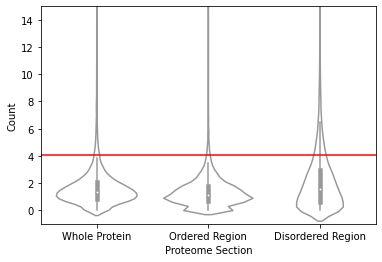

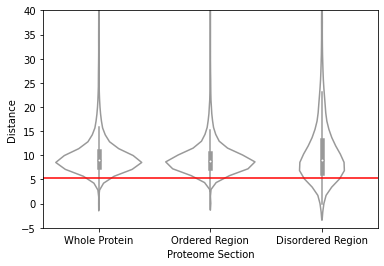

In [10]:
positive_zero_dataframe = pd.DataFrame({'Count': positive_zero})
order_positive_zero_dataframe = pd.DataFrame({'Count': ordered_positive_zero})
disorder_positive_zero_dataframe = pd.DataFrame({'Count': disordered_positive_zero})

positive_nonzero_dataframe = pd.DataFrame({'Values': positive_nonzero})
order_positive_nonzero_dataframe = pd.DataFrame({'Values': ordered_positive_nonzero})
disorder_positive_nonzero_dataframe = pd.DataFrame({'Values': disordered_positive_nonzero})

positive_zero_dataframe['Proteome Section'] = 'Whole Protein'
order_positive_zero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_positive_zero_dataframe['Proteome Section'] = 'Disordered Region'

positive_nonzero_dataframe['Proteome Section'] = 'Whole Protein'
order_positive_nonzero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_positive_nonzero_dataframe['Proteome Section'] = 'Disordered Region'

positive_zero_combined_dataframe = positive_zero_dataframe.append([order_positive_zero_dataframe, disorder_positive_zero_dataframe])
positive_nonzero_combined_dataframe = positive_nonzero_dataframe.append([order_positive_nonzero_dataframe, disorder_positive_nonzero_dataframe])

sns.violinplot(x='Proteome Section', y='Count', data=positive_zero_combined_dataframe, color='white')
plt.axhline(y=4.04040404040404, color='r')
plt.ylim(-1, 15)
plt.savefig('Positive Zero.png')
plt.show()
sns.violinplot(x='Proteome Section', y='Values', data=positive_nonzero_combined_dataframe, color='white')
plt.axhline(y=5.404761904761905, color='r')
plt.ylim(-5, 40)
plt.ylabel('Distance')
plt.savefig('Positive Nonzero.png')

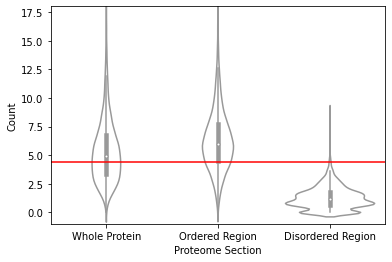

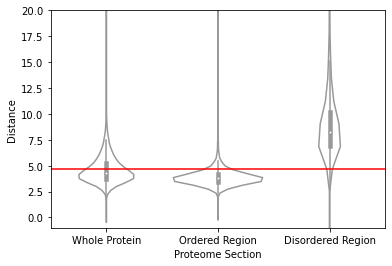

In [11]:
hydrophobic_zero_dataframe = pd.DataFrame({'Count': hydrophobic_zero})
order_hydrophobic_zero_dataframe = pd.DataFrame({'Count': ordered_hydrophobic_zero})
disorder_hydrophobic_zero_dataframe = pd.DataFrame({'Count': disordered_hydrophobic_zero})

hydrophobic_nonzero_dataframe = pd.DataFrame({'Values': hydrophobic_nonzero})
order_hydrophobic_nonzero_dataframe = pd.DataFrame({'Values': ordered_hydrophobic_nonzero})
disorder_hydrophobic_nonzero_dataframe = pd.DataFrame({'Values': disordered_hydrophobic_nonzero})

hydrophobic_zero_dataframe['Proteome Section'] = 'Whole Protein'
order_hydrophobic_zero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_hydrophobic_zero_dataframe['Proteome Section'] = 'Disordered Region'

hydrophobic_nonzero_dataframe['Proteome Section'] = 'Whole Protein'
order_hydrophobic_nonzero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_hydrophobic_nonzero_dataframe['Proteome Section'] = 'Disordered Region'

hydrophobic_zero_combined_dataframe = hydrophobic_zero_dataframe.append([order_hydrophobic_zero_dataframe, disorder_hydrophobic_zero_dataframe])
hydrophobic_nonzero_combined_dataframe = hydrophobic_nonzero_dataframe.append([order_hydrophobic_nonzero_dataframe, disorder_hydrophobic_nonzero_dataframe])

sns.violinplot(x='Proteome Section', y='Count', data=hydrophobic_zero_combined_dataframe, color='white')
plt.axhline(y=4.377104377104377, color='r')
plt.ylim(-1, 18)
plt.savefig('Hydrophobic Zero.png')
plt.show()
sns.violinplot(x='Proteome Section', y='Values', data=hydrophobic_nonzero_combined_dataframe, color='white')
plt.axhline(y=4.653061224489796, color='r')
plt.ylim(-1, 20)
plt.ylabel('Distance')
plt.savefig('Hydrophobic Nonzero.png')

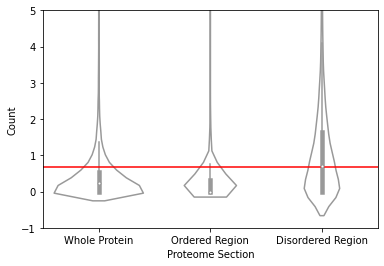

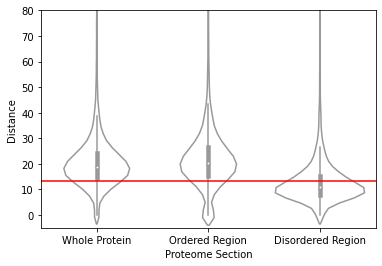

In [12]:
proline_zero_dataframe = pd.DataFrame({'Count': proline_zero})
order_proline_zero_dataframe = pd.DataFrame({'Count': ordered_proline_zero})
disorder_proline_zero_dataframe = pd.DataFrame({'Count': disordered_proline_zero})

proline_nonzero_dataframe = pd.DataFrame({'Values': proline_nonzero})
order_proline_nonzero_dataframe = pd.DataFrame({'Values': ordered_proline_nonzero})
disorder_proline_nonzero_dataframe = pd.DataFrame({'Values': disordered_proline_nonzero})

proline_zero_dataframe['Proteome Section'] = 'Whole Protein'
order_proline_zero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_proline_zero_dataframe['Proteome Section'] = 'Disordered Region'

proline_nonzero_dataframe['Proteome Section'] = 'Whole Protein'
order_proline_nonzero_dataframe['Proteome Section'] = 'Ordered Region'
disorder_proline_nonzero_dataframe['Proteome Section'] = 'Disordered Region'

proline_zero_combined_dataframe = proline_zero_dataframe.append([order_proline_zero_dataframe, disorder_proline_zero_dataframe])
proline_nonzero_combined_dataframe = proline_nonzero_dataframe.append([order_proline_nonzero_dataframe, disorder_proline_nonzero_dataframe])

sns.violinplot(x='Proteome Section', y='Count', data=proline_zero_combined_dataframe, color='white')
plt.axhline(y=0.6734006734006733, color='r')
plt.ylim(-1, 5)
plt.savefig('Proline Zero.png')
plt.show()
sns.violinplot(x='Proteome Section', y='Values', data=proline_nonzero_combined_dataframe, color='white')
plt.axhline(y=13.3, color='r')
plt.ylim(-5, 80)
plt.ylabel('Distance')
plt.savefig('Proline Nonzero.png')